# Project-Sales Data Analysis

We are going to do analysis of data of company situated in various regions. We are also going to see sales of company manufacturing different types of products and performance of employes of the company.

In [1]:
#here we are importing all the libraries we are going to use in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning

Let's read `Region_wise_sales_data.csv` file using `pandas` library and see its description. Then, we will find null or blank cells and duplicate rows in data if there are any.

In [2]:
sales_df1 = pd.read_csv('Region_wise_sales_data.csv')

In [3]:
sales_df1

,order_date,order_num,emp_id,emp_name,emp_job_title,sales_region,order_type,cust_id,cust_name,cust_state,prod_category,prod_num,prod_name,quantity,price
0,03-09-2017,1100948,900015476,Alexis Golsworthy,Senior Sales Associate,N Central East,Retail,2853,Ewan Ladd,Ohio,Training Videos,TV810,Understanding Automation,94,45
1,24-09-2017,1101096,900015476,Alexis Golsworthy,Senior Sales Associate,N Central East,Wholesale,3557,Lockman Group,Kansas,Blueprints,BP104,Cat Robot Blueprint,45,5
2,01-10-2017,1101138,900015476,Alexis Golsworthy,Senior Sales Associate,N Central East,Wholesale,4036,Romaguera LLC,Ohio,Drones,DS306,DX-145 Drone,49,250
3,03-10-2017,1101158,900015476,Alexis Golsworthy,Senior Sales Associate,N Central East,Retail,4377,Vern Hodkiewicz,Minnesota,Drones,DS306,DX-145 Drone,90,250
4,09-10-2017,1101181,900015476,Alexis Golsworthy,Senior Sales Associate,N Central East,Retail,3822,Nolan Wirth,Kansas,eBooks,EB507,Drone Building Essentials,61,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,08-06-2019,1105360,900011189,Wyatt Larose,Senior Sales Representative,Northwest,Retail,2981,Gloria Turner,Idaho,eBooks,EB502,Building Your First Robot,37,25
4972,20-06-2019,1105451,900011189,Wyatt Larose,Senior Sales Representative,Northwest,Wholesale,4049,Rosenbaum LLC,Alaska,Drones,DS303,DTD-7000 Drone,40,450
4973,28-06-2019,1105501,900011189,Wyatt Larose,Senior Sales Representative,Northwest,Wholesale,3111,Herman LLC,Washington,Training Videos,TV812,Understanding Raspberry PI,25,29
4974,07-08-2019,1105748,900011189,Wyatt Larose,Senior Sales Representative,Northwest,Wholesale,3543,Lindgren LLC,Idaho,Drone Kits,DK206,BYOD-400,93,119


In [4]:
sales_df1.info()
#gives basic information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     4976 non-null   object
 1   order_num      4976 non-null   int64 
 2   emp_id         4976 non-null   int64 
 3   emp_name       4976 non-null   object
 4   emp_job_title  4976 non-null   object
 5   sales_region   4976 non-null   object
 6   order_type     4976 non-null   object
 7   cust_id        4976 non-null   int64 
 8   cust_name      4976 non-null   object
 9   cust_state     4976 non-null   object
 10  prod_category  4976 non-null   object
 11  prod_num       4976 non-null   object
 12  prod_name      4976 non-null   object
 13  quantity       4976 non-null   int64 
 14  price          4976 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 583.2+ KB


In [5]:
sales_df1.describe()
# gives summary of data

,order_num,emp_id,cust_id,quantity,price
count,4.976000e+03,4.976000e+03,4976.000000,4976.000000,4976.000000
mean,1.103421e+06,9.000149e+08,3358.756431,54.878215,126.893891
std,1.436546e+03,2.857014e+03,699.285702,26.405391,200.338652
min,1.100934e+06,9.000104e+08,2142.000000,10.000000,5.000000
25%,1.102178e+06,9.000125e+08,2732.000000,32.000000,15.000000
50%,1.103420e+06,9.000150e+08,3421.000000,54.000000,31.500000
75%,1.104665e+06,9.000170e+08,3973.250000,78.000000,179.000000
max,1.105909e+06,9.000200e+08,4502.000000,100.000000,899.000000


In [6]:
sales_df1.isnull().sum()
#find null cells in data

order_date       0
order_num        0
emp_id           0
emp_name         0
emp_job_title    0
sales_region     0
order_type       0
cust_id          0
cust_name        0
cust_state       0
prod_category    0
prod_num         0
prod_name        0
quantity         0
price            0
dtype: int64

In [7]:
sales_df1.duplicated().sum()
#find duplicate rows in data

0

Now, lets drop unnecessary columns from data.

In [8]:
sales_df = sales_df1.drop(columns={'order_num','emp_id','emp_job_title','cust_id','prod_num'})

In [9]:
sales_df

,order_date,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price
0,03-09-2017,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45
1,24-09-2017,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5
2,01-10-2017,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250
3,03-10-2017,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250
4,09-10-2017,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14
...,...,...,...,...,...,...,...,...,...,...
4971,08-06-2019,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25
4972,20-06-2019,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450
4973,28-06-2019,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29
4974,07-08-2019,Wyatt Larose,Northwest,Wholesale,Lindgren LLC,Idaho,Drone Kits,BYOD-400,93,119


This shows that our data does not include any null cell or duplicate data.


Now let's add new column of `total_sales` in data.

In [10]:
sales_df['total_sales'] = sales_df.quantity * sales_df.price

In [11]:
sales_df

,order_date,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales
0,03-09-2017,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230
1,24-09-2017,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225
2,01-10-2017,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250
3,03-10-2017,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500
4,09-10-2017,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854
...,...,...,...,...,...,...,...,...,...,...,...
4971,08-06-2019,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925
4972,20-06-2019,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000
4973,28-06-2019,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725
4974,07-08-2019,Wyatt Larose,Northwest,Wholesale,Lindgren LLC,Idaho,Drone Kits,BYOD-400,93,119,11067



## Exploratory Analysis and Visualization and Question Answers

In this section we ask interesting questions to analyze the data and draw some conclusions based on the analysis.

#### Q1. When did company had its top 10 sales?

In [12]:
sales_df.sort_values

<bound method DataFrame.sort_values of       order_date           emp_name    sales_region order_type  \
0     03-09-2017  Alexis Golsworthy  N Central East     Retail   
1     24-09-2017  Alexis Golsworthy  N Central East  Wholesale   
2     01-10-2017  Alexis Golsworthy  N Central East  Wholesale   
3     03-10-2017  Alexis Golsworthy  N Central East     Retail   
4     09-10-2017  Alexis Golsworthy  N Central East     Retail   
...          ...                ...             ...        ...   
4971  08-06-2019       Wyatt Larose       Northwest     Retail   
4972  20-06-2019       Wyatt Larose       Northwest  Wholesale   
4973  28-06-2019       Wyatt Larose       Northwest  Wholesale   
4974  07-08-2019       Wyatt Larose       Northwest  Wholesale   
4975  18-08-2019       Wyatt Larose       Northwest  Wholesale   

            cust_name  cust_state    prod_category  \
0           Ewan Ladd        Ohio  Training Videos   
1       Lockman Group      Kansas       Blueprints   
2     

In [13]:
#sort top10 values in total_sales  
sales_df.sort_values('total_sales',ascending=False).head(10)

,order_date,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales
89,11-04-2018,Amanda Hebden,Southwest,Retail,Alberta Alasdair,California,Robots,MICR-23K Robot,98,899,88102
4197,02-11-2018,Neil Neeve,S Central West,Wholesale,Dare LLC,Colorado,Robots,RWW-75 Robot,99,883,87417
2879,21-02-2019,Isabelle Cornfield,S Central West,Retail,Astrid Gammett,Colorado,Robots,RWW-75 Robot,95,883,83885
4492,25-04-2019,Ted Botton,Northwest,Retail,Theodora Benedit,Washington,Robots,MICR-23K Robot,93,899,83607
3844,18-11-2018,Michele Cornes,Central East,Wholesale,The TMC Company,Tennessee,Robots,RWW-75 Robot,94,883,83002
1151,19-05-2018,Corey Westbrook,Southwest,Retail,David Goldner,California,Robots,RWW-75 Robot,94,883,83002
3213,24-07-2019,Jason Bellamy,Central East,Wholesale,Kuhlman Inc.,Tennessee,Robots,MICR-23K Robot,92,899,82708
4589,08-12-2018,Tiffani Puckey,Southeast,Retail,Nancie Seide,Florida,Robots,MICR-23K Robot,92,899,82708
2280,17-12-2018,Frank McOwan,N Central East,Wholesale,Langosh Inc.,Minnesota,Robots,RWW-75 Robot,92,883,81236
1823,10-08-2019,Edward Durden,Southeast,Wholesale,Hamill Inc.,Florida,Robots,MICR-23K Robot,90,899,80910


In [14]:
sales_df.order_date

0       03-09-2017
1       24-09-2017
2       01-10-2017
3       03-10-2017
4       09-10-2017
           ...    
4971    08-06-2019
4972    20-06-2019
4973    28-06-2019
4974    07-08-2019
4975    18-08-2019
Name: order_date, Length: 4976, dtype: object

As we can see dates are not in datetime format. Lets convert dates into datetime format to work with dates.

In [15]:
sales_df.order_date = pd.to_datetime(sales_df.order_date)

In [16]:
sales_df.order_date

0      2017-03-09
1      2017-09-24
2      2017-01-10
3      2017-03-10
4      2017-09-10
          ...    
4971   2019-08-06
4972   2019-06-20
4973   2019-06-28
4974   2019-07-08
4975   2019-08-18
Name: order_date, Length: 4976, dtype: datetime64[ns]

Now, you can see type of date is `datetime64`.

Lets seperate `year` and ` month` from date to analyse sales data yearly and monthly.

In [17]:
# It will make two seperate column of year and month in table
sales_df['year'] = pd.DatetimeIndex(sales_df.order_date).year
sales_df['month'] = pd.DatetimeIndex(sales_df.order_date).month

In [18]:
sales_df

,order_date,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
0,2017-03-09,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230,2017,3
1,2017-09-24,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225,2017,9
2,2017-01-10,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250,2017,1
3,2017-03-10,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500,2017,3
4,2017-09-10,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,2019-08-06,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925,2019,8
4972,2019-06-20,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000,2019,6
4973,2019-06-28,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725,2019,6
4974,2019-07-08,Wyatt Larose,Northwest,Wholesale,Lindgren LLC,Idaho,Drone Kits,BYOD-400,93,119,11067,2019,7


Now ,replace index column of serial no. with date column , so that in plots, we will get dates in x-axis.

In [19]:
sales_df.set_index('order_date', inplace= True)

In [20]:
sales_df

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2017-03-09,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230,2017,3
2017-09-24,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225,2017,9
2017-01-10,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250,2017,1
2017-03-10,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500,2017,3
2017-09-10,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-06,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925,2019,8
2019-06-20,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000,2019,6
2019-06-28,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725,2019,6


Lets visualize variation in total sales over period of time.

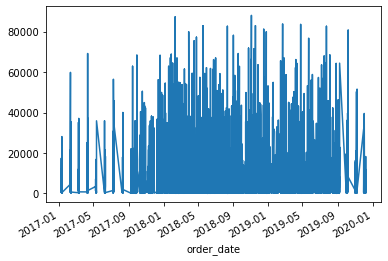

In [21]:
sales_df.total_sales.plot();

Its not readable easily. so lets find out yearly data first.


#### Q2. In which year total sales were highest?

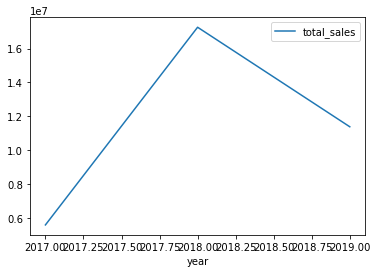

In [22]:
sales_df_yearly = sales_df.groupby('year')[['total_sales']].sum()
sales_df_yearly.plot();
# this will represent variation in total sales over period of time

From graph we can say that, total sales in 2018 were highest.

lets see that value of total sales in each year

In [23]:
sales_df_yearly

,total_sales
year,
2017,5589885
2018,17256095
2019,11382175


lets find out monthly data of 2018 year.

In [24]:
sales_df_2018 = sales_df[sales_df.year == 2018]
sales_df_2018

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2018-08-01,Alexis Golsworthy,N Central East,Wholesale,Langosh Inc.,Minnesota,Robot Kits,BYOR-1500,34,189,6426,2018,8
2018-09-01,Alexis Golsworthy,N Central East,Wholesale,Bashirian International,Illinois,Training Videos,Cloud Computing,92,30,2760,2018,9
2018-01-19,Alexis Golsworthy,N Central East,Wholesale,Kessler Inc.,Ohio,Blueprints,Panda Robot Blueprint,64,8,512,2018,1
2018-01-22,Alexis Golsworthy,N Central East,Wholesale,Heller Inc.,Minnesota,Training Videos,Cloud Computing,64,30,1920,2018,1
2018-01-25,Alexis Golsworthy,N Central East,Retail,Mitchell Hayes,Kansas,eBooks,GPS Drones,13,20,260,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-12,Wyatt Larose,Northwest,Retail,Cam Beacon,Oregon,Blueprints,Cat Robot Blueprint,60,5,300,2018,1
2018-05-12,Wyatt Larose,Northwest,Wholesale,Flatley-Effertz,Washington,Blueprints,Hexacopter Drone Blueprint,49,9,441,2018,5
2018-12-20,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,eBooks,GPS Drones,16,20,320,2018,12


Top 10 sales in 2018

In [25]:
sales_df_2018.sort_values('total_sales', ascending= False).head(10)

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2018-11-04,Amanda Hebden,Southwest,Retail,Alberta Alasdair,California,Robots,MICR-23K Robot,98,899,88102,2018,11
2018-02-11,Neil Neeve,S Central West,Wholesale,Dare LLC,Colorado,Robots,RWW-75 Robot,99,883,87417,2018,2
2018-11-18,Michele Cornes,Central East,Wholesale,The TMC Company,Tennessee,Robots,RWW-75 Robot,94,883,83002,2018,11
2018-05-19,Corey Westbrook,Southwest,Retail,David Goldner,California,Robots,RWW-75 Robot,94,883,83002,2018,5
2018-08-12,Tiffani Puckey,Southeast,Retail,Nancie Seide,Florida,Robots,MICR-23K Robot,92,899,82708,2018,8
2018-12-17,Frank McOwan,N Central East,Wholesale,Langosh Inc.,Minnesota,Robots,RWW-75 Robot,92,883,81236,2018,12
2018-03-30,Anthony Smallpeace,Central East,Wholesale,Feil LLC,Maryland,Robots,MICR-23K Robot,89,899,80011,2018,3
2018-12-26,Ara Dumbreck,N Central East,Retail,Edwina Raeburn,Kansas,Robots,MICR-23K Robot,89,899,80011,2018,12
2018-09-02,Kristine Halloran,Northeast,Wholesale,Dickens LLC,Connecticut,Robots,MICR-23K Robot,87,899,78213,2018,9


Lets visualize monthly total sales in 2018

#### Q3. In which Month of 2018, total sales were highest?

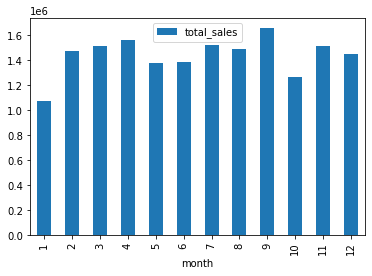

In [26]:
sales_df_2018_monthly = sales_df_2018.groupby('month')[['total_sales']].sum()
sales_df_2018_monthly.plot.bar();

We can say that,in month no.9 i.e. september company had highest total sales.

lets see that value.

In [27]:
sales_df_2018_monthly

,total_sales
month,
1,1068320
2,1470894
3,1512361
4,1560594
5,1376006
6,1386078
7,1516248
8,1485212
9,1655773


In [28]:
sales_df

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2017-03-09,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230,2017,3
2017-09-24,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225,2017,9
2017-01-10,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250,2017,1
2017-03-10,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500,2017,3
2017-09-10,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-06,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925,2019,8
2019-06-20,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000,2019,6
2019-06-28,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725,2019,6


#### Q4. In which region ,total sales were highest un given period of time?
Lets find region wise total sales

In [29]:
sales_df_region = sales_df.groupby('sales_region')[['total_sales']].sum()
sales_df_region

,total_sales
sales_region,
Central East,5572097
N Central East,5780591
N Central West,704131
Northeast,5133305
Northwest,1687151
S Central East,4853892
S Central West,2006003
Southeast,5021394
Southwest,3469591


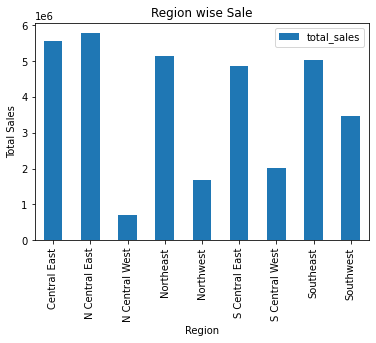

In [30]:
sales_df_region.plot.bar(title='Region wise Sale', xlabel='Region', ylabel='Total Sales');

From bar graph we get that N Central East area had highest sale in given period of time. Value for total sale is 5780591.



lets find out state wise sales.

#### Q5. In which state, Sales were highest in given period of time?

In [31]:
sales_df_state = sales_df.groupby('cust_state')[['total_sales']].sum()
sales_df_state

,total_sales
cust_state,
Alabama,634627
Alaska,113745
Arizona,858204
Arkansas,164835
California,2872809
Colorado,623131
Connecticut,309042
Delaware,294145
District of Columbia,768798


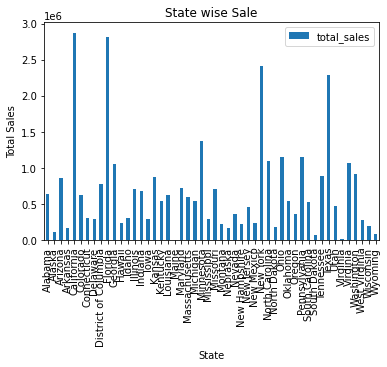

In [32]:
sales_df_state.plot.bar(title='State wise Sale', xlabel='State', ylabel='Total Sales');

From Graph and calculated data , we conclude that California had highest sales of  2872809 units.

In [33]:
sales_df

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2017-03-09,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230,2017,3
2017-09-24,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225,2017,9
2017-01-10,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250,2017,1
2017-03-10,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500,2017,3
2017-09-10,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-06,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925,2019,8
2019-06-20,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000,2019,6
2019-06-28,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725,2019,6


#### Q6. Which Product category sold highest no. of items ?

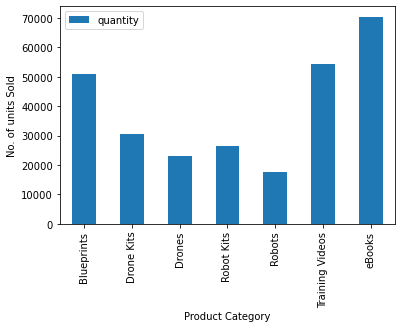

In [34]:
sales_df_prod_cat = sales_df.groupby('prod_category')[['quantity']].sum()
sales_df_prod_cat.plot.bar(xlabel='Product Category', ylabel='No. of units Sold');

In [35]:
sales_df_prod_cat

,quantity
prod_category,
Blueprints,50799
Drone Kits,30383
Drones,22962
Robot Kits,26492
Robots,17720
Training Videos,54309
eBooks,70409


From graph and calculated values , we can say that eBooks category had highest sale of 70409 items.

#### Q 7. Which employee of company gave highest sale to company?


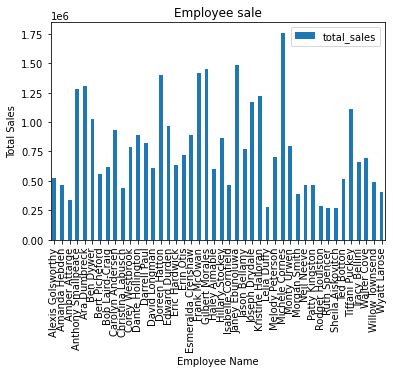

In [36]:
sales_df_emp = sales_df.groupby('emp_name')[['total_sales']].sum()
sales_df_emp.plot.bar(title='Employee sale', xlabel='Employee Name', ylabel='Total Sales');

In [37]:
sales_df_emp

,total_sales
emp_name,
Alexis Golsworthy,522789
Amanda Hebden,462920
Amber Attarge,335178
Anthony Smallpeace,1279433
Ara Dumbreck,1306205
Ben Dywer,1025873
Bert Picheford,558750
Bob Laird-Craig,620829
Carolyn Andersen,928742


From graph and calculated values, we conclude that employee `Michele Corners` gave highest sale to company with total sale of 1761291 units.

In [38]:
sales_df

,emp_name,sales_region,order_type,cust_name,cust_state,prod_category,prod_name,quantity,price,total_sales,year,month
order_date,,,,,,,,,,,,
2017-03-09,Alexis Golsworthy,N Central East,Retail,Ewan Ladd,Ohio,Training Videos,Understanding Automation,94,45,4230,2017,3
2017-09-24,Alexis Golsworthy,N Central East,Wholesale,Lockman Group,Kansas,Blueprints,Cat Robot Blueprint,45,5,225,2017,9
2017-01-10,Alexis Golsworthy,N Central East,Wholesale,Romaguera LLC,Ohio,Drones,DX-145 Drone,49,250,12250,2017,1
2017-03-10,Alexis Golsworthy,N Central East,Retail,Vern Hodkiewicz,Minnesota,Drones,DX-145 Drone,90,250,22500,2017,3
2017-09-10,Alexis Golsworthy,N Central East,Retail,Nolan Wirth,Kansas,eBooks,Drone Building Essentials,61,14,854,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-06,Wyatt Larose,Northwest,Retail,Gloria Turner,Idaho,eBooks,Building Your First Robot,37,25,925,2019,8
2019-06-20,Wyatt Larose,Northwest,Wholesale,Rosenbaum LLC,Alaska,Drones,DTD-7000 Drone,40,450,18000,2019,6
2019-06-28,Wyatt Larose,Northwest,Wholesale,Herman LLC,Washington,Training Videos,Understanding Raspberry PI,25,29,725,2019,6


#### Q8. In which order type, company had higher sales?

,total_sales
order_type,
Retail,14713932
Wholesale,19514223


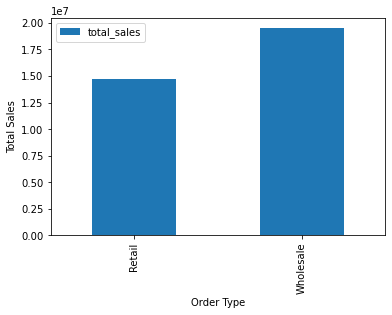

In [39]:
sales_df_ord = sales_df.groupby('order_type')[['total_sales']].sum()
sales_df_ord.plot.bar(xlabel='Order Type', ylabel='Total Sales');
sales_df_ord

From graph and calculations, we conclude that company had grater sales due to wholesale customers.

#### Q9. find total  numbers of wholesale and retail customers?

Wholesale    2833
Retail       2143
Name: order_type, dtype: int64


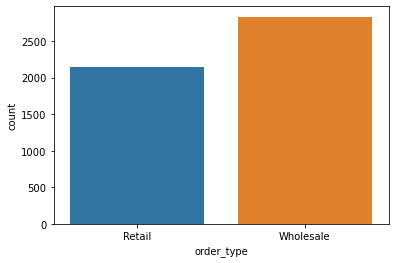

In [40]:
print(sales_df['order_type'].value_counts())
sns.countplot(x='order_type', data=sales_df);

## Inferences and Conclusion

- We found out highest sales each year, in various regions, in various states. - Also calculated product category wise sales, sales by each employee in 2018.
- Also found out that there are more wholesale customers than retail customers.
- Also calculated total sales by wholesale and retail customers seperately.
- Total sales from wholesale customers is greater.
